In [39]:
import keras
from keras.layers import Embedding, SimpleRNN, Dense, LSTM
from keras.models import Sequential
from keras.datasets import imdb
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [40]:
#loading data and split into train and test

max_features = 10000 #vocaulary of most used 10000 words
max_length = 500 #terminate the text after 500 words
batch_size = 32

print("Loading Data")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), "train sequences")
print(len(input_test), "test sequences")

print("pad sequences (samples x time)")
input_train = sequence.pad_sequences(input_train, maxlen=max_length)
input_test = sequence.pad_sequences(input_test, maxlen=max_length)

print("train data shape: ", input_train.shape)
print("test data shape: ", input_test.shape)

Loading Data
25000 train sequences
25000 test sequences
pad sequences (samples x time)
train data shape:  (25000, 500)
test data shape:  (25000, 500)


In [41]:
#define model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid')) #sigmoid for binary classification like positive/negative
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [42]:
#compile model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [43]:
#fit model for validation
history = model.fit(input_train, y_train,
                     epochs=10,
                     batch_size=128,
                     validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.6498 - acc: 0.6059 - val_loss: 0.6683 - val_acc: 0.5872
Epoch 2/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.4224 - acc: 0.8167 - val_loss: 0.4288 - val_acc: 0.8132
Epoch 3/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.3026 - acc: 0.8772 - val_loss: 0.3865 - val_acc: 0.8314
Epoch 4/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.2182 - acc: 0.9166 - val_loss: 0.4127 - val_acc: 0.8210
Epoch 5/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.1595 - acc: 0.9428 - val_loss: 0.4982 - val_acc: 0.7902
Epoch 6/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.1058 - acc: 0.9638 - val_loss: 0.4213 - val_acc: 0.8566
Epoch 7/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.0705 - acc: 0.9768 - val_loss: 0.5059 - val_acc:

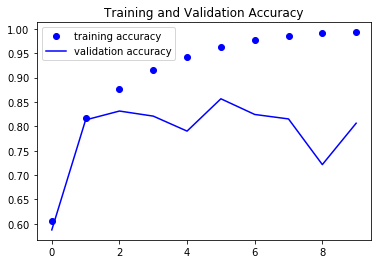

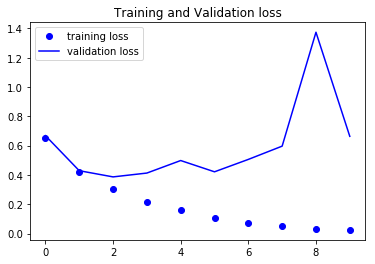

In [44]:
#plot validation history
acc = history.history['acc'] #training acuracy
val_acc = history.history['val_acc'] #validation accuracy
loss = history.history['loss'] #training loss
val_loss = history.history['val_loss'] #validation loss

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label="training accuracy")
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label="training loss")
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title("Training and Validation loss")
plt.legend()

plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.5093 - acc: 0.7627 - val_loss: 0.3859 - val_acc: 0.8518
Epoch 2/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.2958 - acc: 0.8819 - val_loss: 0.3797 - val_acc: 0.8316
Epoch 3/10
20000/20000 [==============================] - 86s 4ms/step - loss

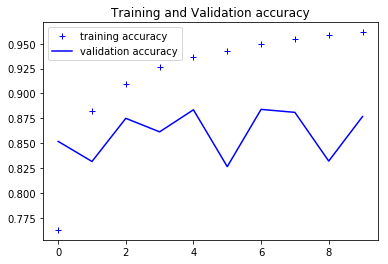

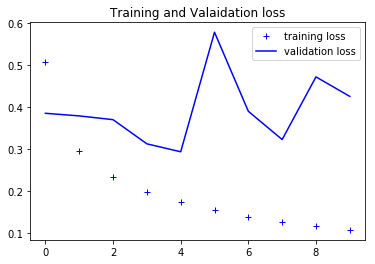

In [45]:
#define lstm model

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#compile lstm model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

#fit lstm model for validation
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b+', label="training accuracy")
plt.plot(epochs, val_acc, 'b', label="validation accuracy")
plt.title("Training and Validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b+', label = "training loss")
plt.plot(epochs, val_loss, 'b', label = "validation loss")
plt.title("Training and Valaidation loss")
plt.legend()

plt.show()